In [0]:
# Step 1: Import packages

import torch
import torchvision
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [0]:
#installation
!pip3 install torch torchvision

In [0]:
# Step 2: Prepare the dataset

transform = transforms.Compose([
                                transforms.Resize(28,28),
                                transforms.ToTensor(), 
                                transforms.Normalize([0.1307], [0.3081])

                                
])

train_dataset = torchvision.datasets.MNIST(root='./data/MNIST', train=True, download=True, transform=transform)
val_dataset = torchvision.datasets.MNIST(root='./data/MNIST', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)


In [0]:
# Step 3: Build a CNN
class Net(nn.Module):
    def __init__(self, num_classes=10):
      super().__init__()
      self.conv1 = nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1, padding=0)
      self.conv2 = nn.Conv2d(in_channels=20, out_channels=50, kernel_size=5, stride=1, padding=0)
      self.fc1 = nn.Linear(4*4*50, 500)
      self.dropout1 = nn.Dropout(0.5)
      self.fc2 = nn.Linear(500, num_classes)
    def forward(self, x):
      x = self.conv1(x)
      x = F.relu(x)
      x = F.max_pool2d(x, 2, 2)
      x = self.conv2(x)
      x = F.relu(x)
      x = F.max_pool2d(x, 2, 2)
      x = x.view(-1, 4*4*50)
      x = F.relu(self.fc1(x))
      x = self.dropout1(x)
      x = self.fc2(x)
      return x

In [0]:
# make sure to enable GPU acceleration!
device = 'cuda'

In [0]:
# Step 4: Instantiate the model
model = Net()
model.to(device)

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [0]:
# Step 5: Create a loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 3e-4)

In [0]:
#Step 6: Training the Network
# Do a forward pass
# Calculate loss
# Calculate gradients
# Update the weights based on the computed gradients


# keep track of loss and accuracy

training_loss_history = []
training_corrects_history = []
val_loss_history = []
val_corrects_history = []
for e in range(20):
  
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0

  # train the model #

  for inputs, labels in train_loader:
    # Move the training data to the GPU
    inputs = inputs.to(device)
    labels = labels.to(device)

    # forward propagation
    outputs = model(inputs)

    # calculate the loss
    loss = criterion(outputs, labels)
    
    # clear previous gradient computation
    optimizer.zero_grad()
    
    # backpropagate to compute gradients
    loss.backward()

    # update model weights
    optimizer.step()
    
    #predictions
    _, preds = torch.max(outputs, 1)

    #update running loss
    running_loss += loss.item()

    # update runnung accuracy
    running_corrects += torch.sum(preds == labels.data)
  
  # validate the model 

  else:
    with torch.no_grad():
      for val_inputs, val_labels in val_loader:
        # Move the training data to the GPU
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)

        # forward propagation
        val_outputs = model(val_inputs)

        # calculate the loss
        val_loss = criterion(val_outputs, val_labels)
        
        # predictions
        _, val_preds = torch.max(val_outputs, 1)

        # update val running loss
        val_running_loss += val_loss.item()

        # update val accuracy
        val_running_corrects += torch.sum(val_preds == val_labels.data)

    # Calculate Training loss 
    epoch_loss = running_loss/len(train_loader.dataset) 
    training_loss_history.append(epoch_loss)

    # Calculate Training Accuracy
    epoch_acc = running_corrects.float()/ len(train_loader.dataset)  
    training_corrects_history.append(epoch_acc)

    # Calculate validation loss
    val_epoch_loss = val_running_loss/len(val_loader.dataset) 
    val_loss_history.append(val_epoch_loss)

    # Calculate validation accuracy
    val_epoch_acc = val_running_corrects.float()/ len(val_loader.dataset) 
    val_corrects_history.append(val_epoch_acc)

    # Priniting the epoch, loss and accuracy
    print('epoch :', (e+1))
    print('training loss: {:.4f}, Training accuracy {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, validation accuracy {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))

epoch : 1
training loss: 0.0057, Training accuracy 0.9462 
validation loss: 0.0020, validation accuracy 0.9817 
epoch : 2
training loss: 0.0019, Training accuracy 0.9818 
validation loss: 0.0017, validation accuracy 0.9818 
epoch : 3
training loss: 0.0013, Training accuracy 0.9875 
validation loss: 0.0012, validation accuracy 0.9874 
epoch : 4
training loss: 0.0011, Training accuracy 0.9895 
validation loss: 0.0009, validation accuracy 0.9907 
epoch : 5
training loss: 0.0008, Training accuracy 0.9917 
validation loss: 0.0010, validation accuracy 0.9904 
epoch : 6
training loss: 0.0007, Training accuracy 0.9930 
validation loss: 0.0011, validation accuracy 0.9903 
epoch : 7
training loss: 0.0006, Training accuracy 0.9937 
validation loss: 0.0010, validation accuracy 0.9907 
epoch : 8
training loss: 0.0005, Training accuracy 0.9949 
validation loss: 0.0012, validation accuracy 0.9900 
epoch : 9
training loss: 0.0004, Training accuracy 0.9957 
validation loss: 0.0010, validation accuracy 

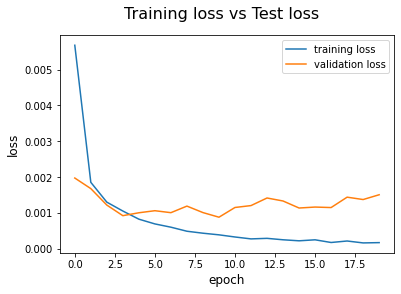

In [0]:
#plot the training and validation loss
plt.plot(training_loss_history, label='training loss')
plt.plot(val_loss_history, label='validation loss')
plt.suptitle('Training loss vs Test loss', fontsize=16)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.legend()

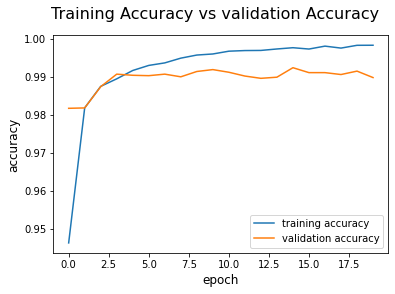

In [0]:
#plot the training and validation accuracy
plt.plot(training_corrects_history, label='training accuracy')
plt.plot(val_corrects_history, label='validation accuracy')
plt.suptitle('Training Accuracy vs validation Accuracy', fontsize=16)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.legend()